En esta sección se trabaja con el modelo del umbral con perfiles mismo que se aplicará a la red.

Enlace a la librería usada:

https://ndlib.readthedocs.io/en/latest/reference/models/epidemics/ProfileThreshold.html

In [ ]:
#Instalamos la librería
pip install ndlib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Obtaining dependency information for ndlib from https://files.pythonhosted.org/packages/15/dc/1d7fd0b5a0917a8f27ae2d7fa6009857991ed05a89f65b352d937439f9ab/ndlib-5.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for netdispatch from https://files.pythonhosted.org/packages/dd/ad/eb88790662e4215174d0f49d431010c83fedff2ad102f4e93abceaf085f0/netdispatch-0.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for python-igraph from https://files.pythonhosted.org/packages/ac/37/3fb69b17599b4c76f75bdf00ea4b78394d3cbf1fc0ba31179861153c239f/python_igraph-0.11.8-py3-none-any.whl.metadata
  Obtaining dependency information for dynetx from https://files.pythonhosted.org/packages/cb/66/a185a9ba8edcf75c4aacf37198702727a322772c72b8312ca26a35ebbf69/dynetx-0.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for igraph

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [80]:
# Se importa la librería networkx para trabajar con grafos
# Se importan los módulos necesarios de ndlib para configurar y ejecutar el modelo
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

from pyvis.network import Network


# Se crea una topología de red utilizando el modelo de Barabasi-Albert //Esta parte se puede cambiar por cualquier otro modelo de red
g = nx.barabasi_albert_graph(100, 1)

# Se selecciona el modelo de umbral de perfil
model = ep.ProfileThresholdModel(g)
config = mc.Configuration()

# Se configuran los parámetros del modelo
config.add_model_parameter('blocked', 0)
config.add_model_parameter('adopter_rate', 0)
config.add_model_parameter('fraction_infected', 0.5)

# Se configuran los parámetros de los nodos
threshold = 0.60
profile = 0.60

for i in g.nodes():
    config.add_node_configuration("threshold", i, threshold)
    config.add_node_configuration("profile", i, profile)

# Se establece el estado inicial del modelo con la configuración dada
model.set_initial_status(config)

# Se ejecuta la simulación por 50 iteraciones
iterations = model.iteration_bunch(50)

#Visualización de la red

# Crear la red con opciones adicionales
net = Network(
    height='100vh', 
    width='100%', 
    bgcolor='#ffffff',
    font_color='#000000',
    notebook=True,
    select_menu=True, 
    filter_menu=True
)

# Configurar opciones
net.set_options("""
{
  "physics": {
    "enabled": true,
    "barnesHut": {
      "gravitationalConstant": -2000,
      "centralGravity": 0.1,
      "springLength": 55,
      "springConstant": 0.14,
      "damping": 0.09
    },
    "minVelocity": 0.75,
    "maxVelocity": 5
  },
  "interaction": {
    "navigationButtons": true
  },
  "configure": {
    "enabled": true,
    "filter": "all"
  },
  "nodes": {
    "borderWidth": 0
  }
}
""")



# Colorear nodos y aristas
for node in g.nodes():
    if model.status[node] == 1:  # Si el nodo adquirió el comportamiento
      net.add_node(node, size='size', color='#3B4285', etiqueta='corrupto')
    else:  # Si el nodo no adquirió el comportamiento
      net.add_node(node, size='size', color='#9FA3D5', etiqueta='honesto')
        
# Colorear aristas de color azul y ancho 2
for edge in g.edges():
  net.add_edge(edge[0], edge[1], color='#3B4285', width=2)

# Convertir de networkx a PyVis
net.from_nx(g)

# Calcular el grado de cada nodo
degree_dict = dict(g.degree())

# Normalizar los tamaños de los nodos
max_degree = max(degree_dict.values())
min_size = 10
max_size = 30

for node in net.nodes:
    node_id = node['id']
    degree = degree_dict[node_id]
    
    # Calcular el tamaño proporcional
    size = min_size + (degree / max_degree) * (max_size - min_size)
    
    node['size'] = size


# Mostrar la red (sin show_buttons)
net.show('red_dinámica_umbral_perfiles.html')

red_dinámica_umbral_perfiles.html


Se añade la visualización de la dinámica

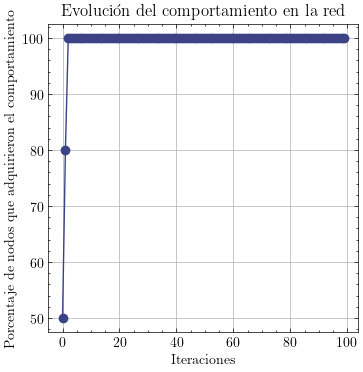

In [33]:
import matplotlib.pyplot as plt
import scienceplots

# Extraer el número de nodos que adquirieron un comportamiento en cada iteración
adopted_nodes = [iteration['node_count'][1] for iteration in iterations]

# Calcular el porcentaje de nodos que adquirieron un comportamiento
total_nodes = len(g.nodes())
adopted_percentage = [count / total_nodes * 100 for count in adopted_nodes]

# Importar el estilo de scienceplots
plt.style.use('science')

# Crear la gráfica
plt.figure(figsize=(4, 4))
plt.plot(range(len(adopted_percentage)), adopted_percentage, marker='o', color='#3B4285')
plt.xlabel('Iteraciones')
plt.ylabel('Porcentaje de nodos que adquirieron el comportamiento')
plt.title('Evolución del comportamiento en la red')
plt.grid(True)

# Guardar el gráfico con mayor resolución
plt.savefig('nodos_que_adquirieron_comportamiento.png', dpi=300)  

plt.show()